# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [30]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [31]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [32]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


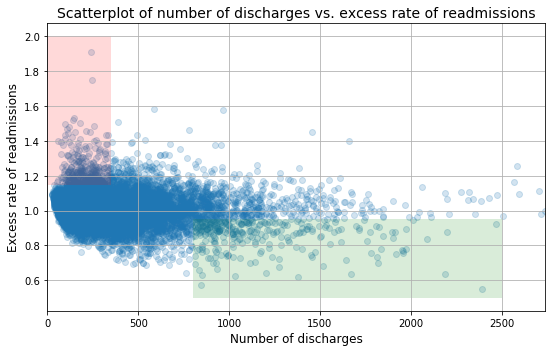

In [33]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### QA
I would not agree with the above analysis. 

It might be fair to assume a correlation between'Excess rate of readmissions' versus 'Number of Discharges' based on the observations of the scatter plot; though the excess rates seem to be randomly scattered around 1.0 among all number of discharges, further test can be done to explore any hypothesis;

The real problem is in Step B where there are two issues. First, the thresholds to split the exposure variable is very arbitrary and suspicious. Step B only took into account the hospitals that had number of discharges < 100 and those >1000, ignoring the hospitals with number of discharges in between 100 and 1000. Given that large proportion of the hospitals are actually those having number of discharges between 100 and 1000, this comparison is very confusing and lacks credibility.
Second, to make a conclusion in Step C about a "significant correlation", a two-sample test such as z-test or linear regression would be the only valid way, instead of just the difference in proportions.

### QB
1.Setup an appropriate hypothesis test:

Null Hypothesis: Lower number of discharges is linearly correlated with higher excess rate of readmissions 

(Note: based on the scatter plot, the relationship between number of discharges and excess rate of readmissions should not be non-linear; so the linear correlation was assumed.)

A permutation test with α  = .01 would be used to test for the statistical significance of the hypothesis.

In [38]:
clean_hospital_read_df.info()# There are missing values for the outcome variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


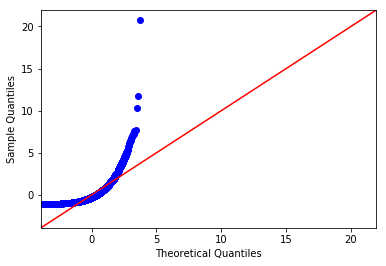

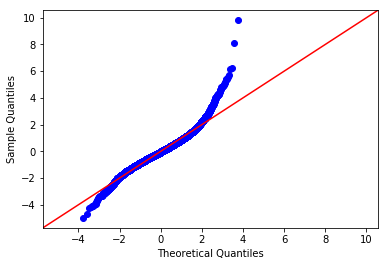

In [48]:
from statsmodels.graphics.gofplots import qqplot

df=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']>=0]
qq=qqplot(df['Number of Discharges'],fit=True,line='45')
qq=qqplot(df['Excess Readmission Ratio'],fit=True,line='45')
plt.show()

As shown in the Q-Q plot, the two variables are not normally distributed; therefore, a non-parametric test (permutation test) was done:

In [74]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

r=pearson_r(df['Number of Discharges'],df['Excess Readmission Ratio'])

perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    permuted = np.random.permutation(df['Number of Discharges'])

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(permuted,df['Excess Readmission Ratio'])

# Compute p-value: p
p = np.sum(perm_replicates<=r)/len(perm_replicates)
print('p-val =', p)
print('r =', r)

p-val = 0.0
r = -0.0973979435107935


2&3. The p value is 0.0. Since the p value is less than 0.01, I would reject the null hypothesis and conclude that there is a statistical relationship between the number of discharges and excess readmission ratio.
4. Statistical significance not necessarily implies practial significance since the correlation between the two variable is only -0.1, which is a very weak correlation. My recommendation would be to explore other factors that my influence the outcome.

5. Advantages of the scatterplot include that it is helpful to sense potential relationship between predictor and outcome variables, regardless of linear or non-linear assosiations; it also helps to find clustered data in a very intuitive and visual way; Disadvantages of the scatterplot is overlay of the data points.

A more direct plot would be a linear regression line:

The r^2 value (or coeff. of determination) for this linear regression is: 7.644742431673346e-12
The slope for this linear regression is: -2.9010517330570684e-05


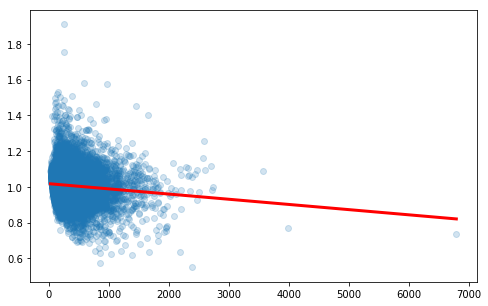

In [75]:
# Plot
from scipy import stats
from math import *

x1=df['Number of Discharges']
y1=df['Excess Readmission Ratio']

slope, intercept, r_val, p_val, std_err = stats.linregress(x1,y1)

print ("The r^2 value (or coeff. of determination) for this linear regression is:", std_err ** 2)
print ("The slope for this linear regression is:", slope)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1, alpha=0.2)
plt.plot(x1, (slope * x1 + intercept), 'r-', color='Red', linewidth=3.0)
plt.show()
